Name - Yash Malviya

Designation - Data Analytics Internship @Oasis Infobyte

Task - Task 2 , Level 1 , Customer Segmentation Analysis

Date - 28/07/2024

1.Data Collection

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [ ]:
#Reading the data
data = pd.read_csv('ifood_df.csv')

#Taking a look at the top 5 rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
#Looking for any missing values
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
#Checking Column Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
#Assessing unique values
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

2.Data Exploration

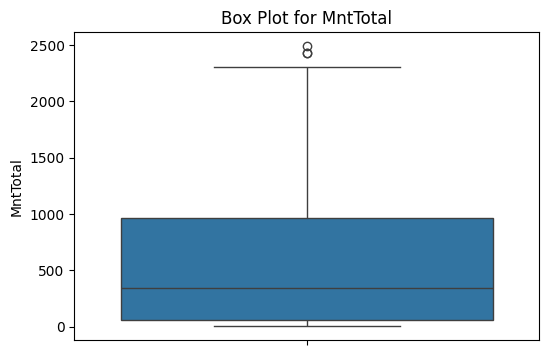

In [ ]:
#Box plot for the total amount spent on all products
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [ ]:
#Outliers
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [ ]:
#Outliers Removal
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


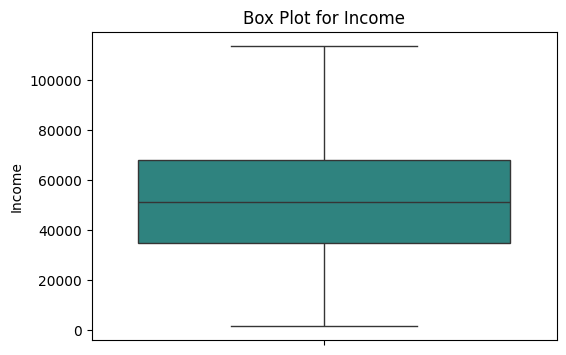

In [ ]:
#Box plot and histogram for income¶
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

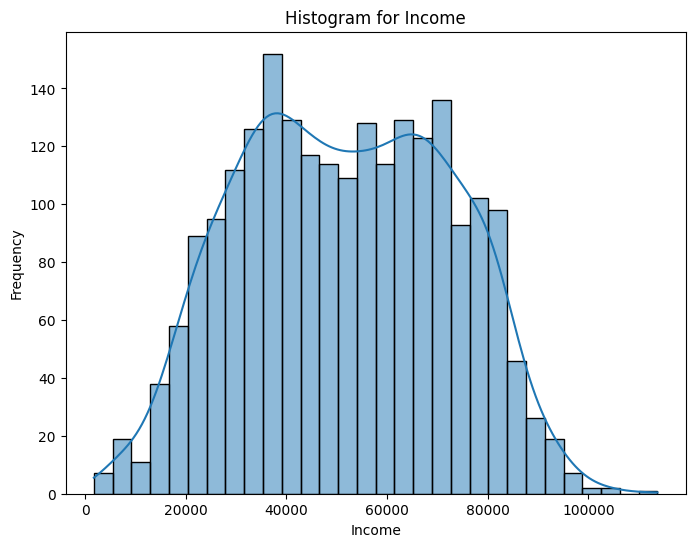

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

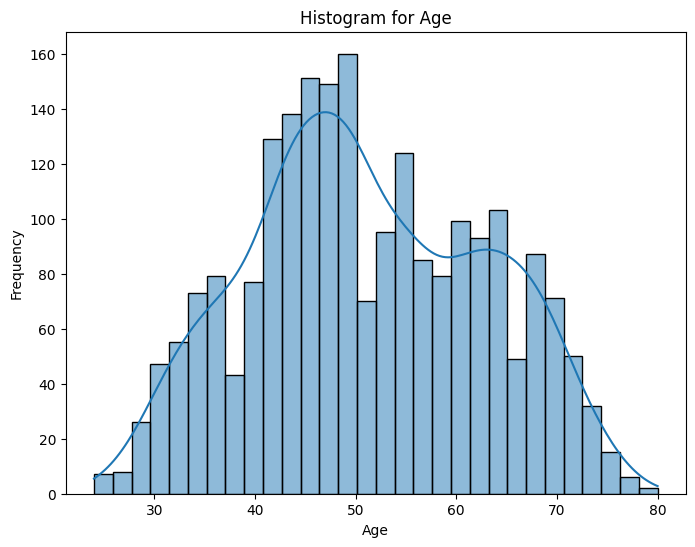

In [ ]:
#Histogram for age¶
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


In [ ]:
#Corellation Matrix
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

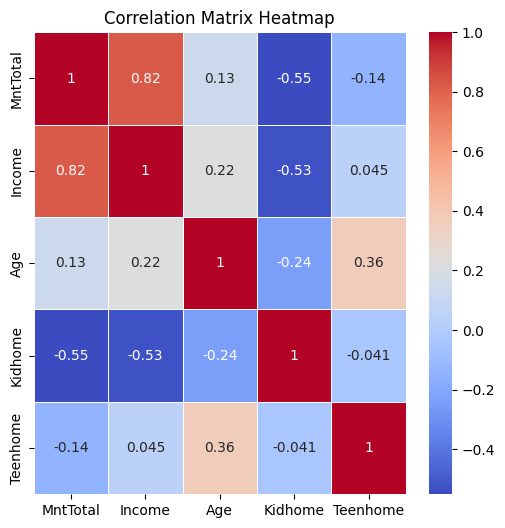

In [ ]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

3.Descriptive Statistics

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'ifood_df.csv'
ifood_df = pd.read_csv(file_path)

# Calculate average purchase value
average_purchase_value = ifood_df['MntTotal'].mean()
print(f"Average Purchase Value: {average_purchase_value}")

# Calculate frequency of purchases (total number of purchases)
purchase_frequency = ifood_df['MntTotal'].count()
print(f"Frequency of Purchases: {purchase_frequency}")

# Calculate descriptive statistics for purchase amounts
descriptive_stats = ifood_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                              'MntSweetProducts', 'MntGoldProds', 'MntTotal']].describe()

print("Descriptive Statistics for Purchase Amounts:")
print(descriptive_stats)


Average Purchase Value: 562.7646258503402
Frequency of Purchases: 2205
Descriptive Statistics for Purchase Amounts:
          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2205.000000  2205.000000      2205.000000      2205.000000   
mean    306.164626    26.403175       165.312018        37.756463   
std     337.493839    39.784484       217.784507        54.824635   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     178.000000     8.000000        68.000000        12.000000   
75%     507.000000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds     MntTotal  
count       2205.000000   2205.000000  2205.000000  
mean          27.128345     44.057143   562.764626  
std           41.130468     51.736211   575.936911  
min            0.000000      0.000000     4.000000

4.Customer Segmentation

5.Visualization

Using K-Means Clusturing

In [ ]:
from sklearn.cluster import KMeans

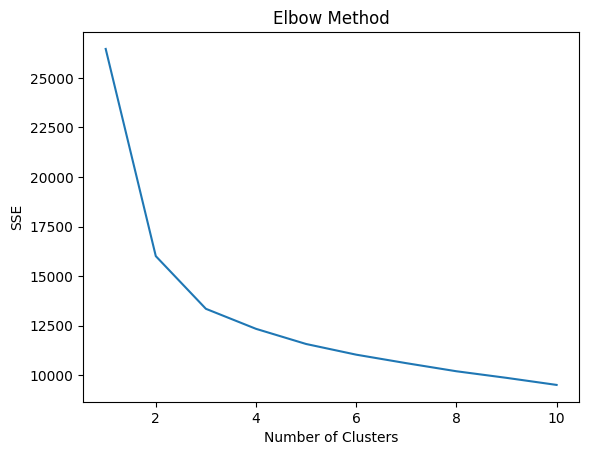

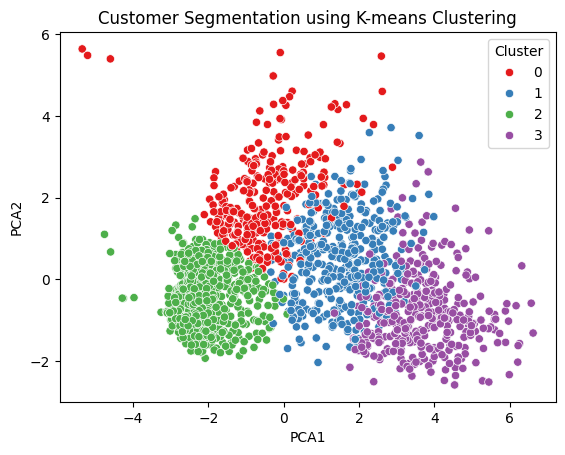

Cluster Centroids:
         Income    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  49705.217125  331.342508  12.470948        95.486239        19.896024   
1  66937.201299  607.476190  32.813853       215.573593        42.272727   
2  34245.165314   38.804260   4.765720        20.949290         7.011156   
3  76470.681395  576.346512  79.725581       495.437209       116.986047   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0         13.923547     58.082569           5.235474         6.400612   
1         33.969697     58.292208           2.145022         6.030303   
2          4.964503     14.561866           1.877282         2.003043   
3         80.641860     85.730233           1.297674         5.088372   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0             2.159021           6.036697           7.067278  
1             4.218615           8.889610           4.400433  
2             0.536511           3.204868    

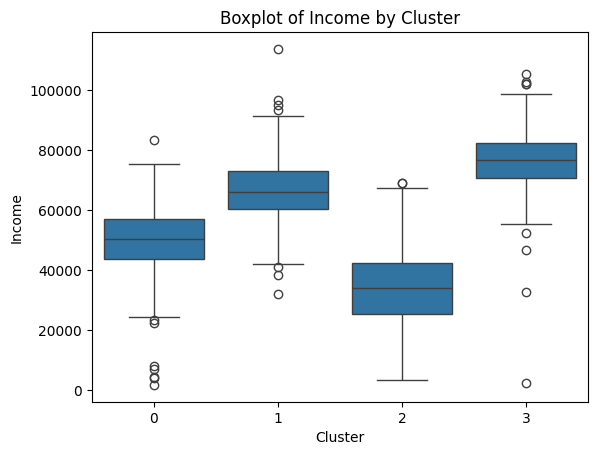

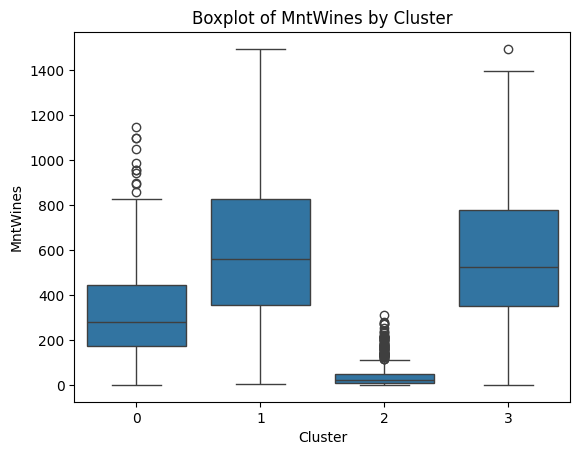

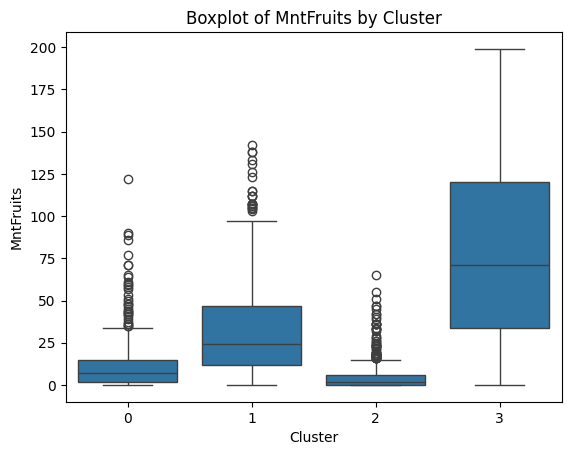

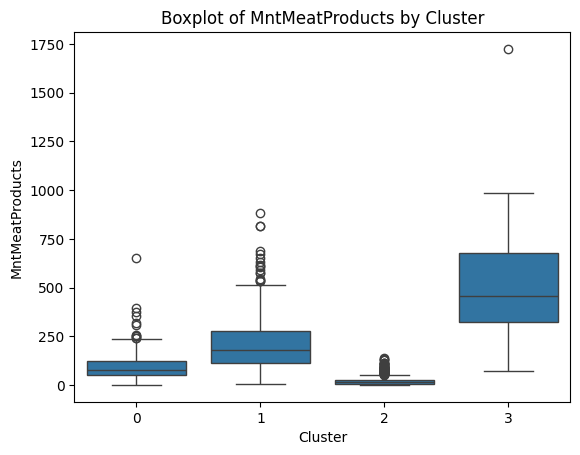

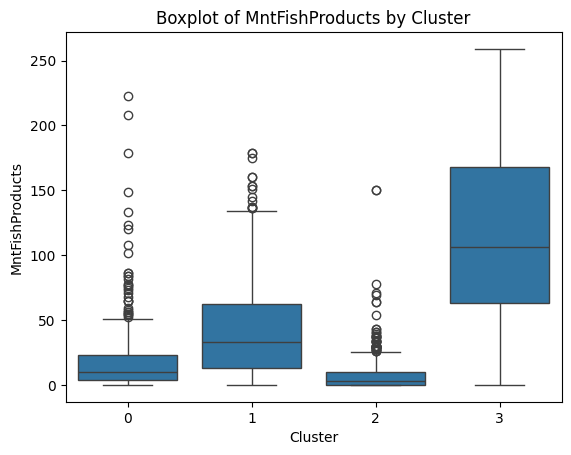

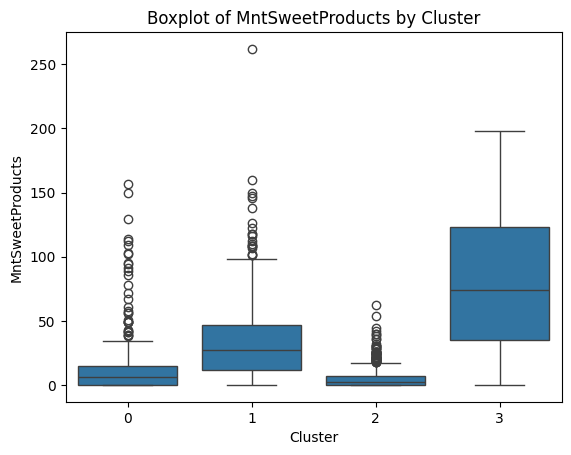

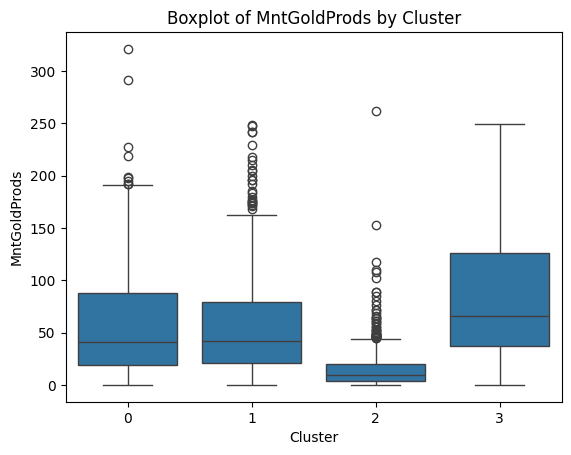

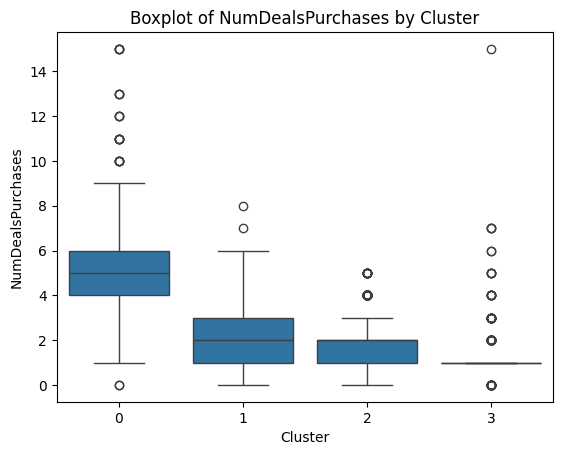

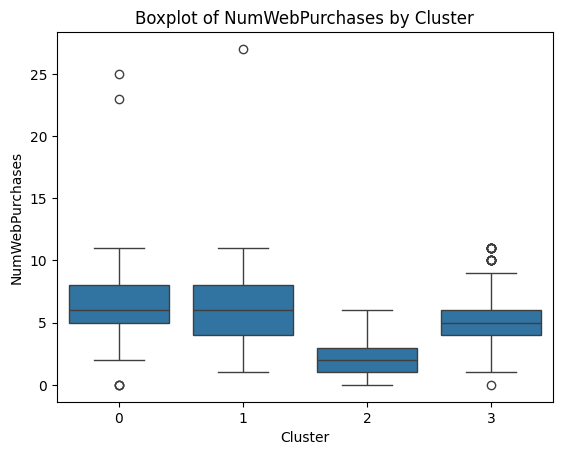

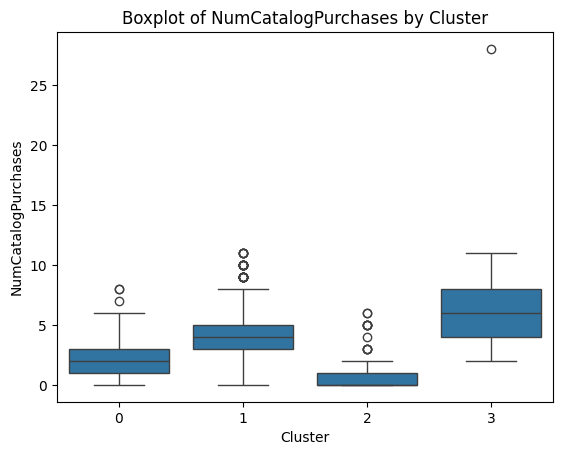

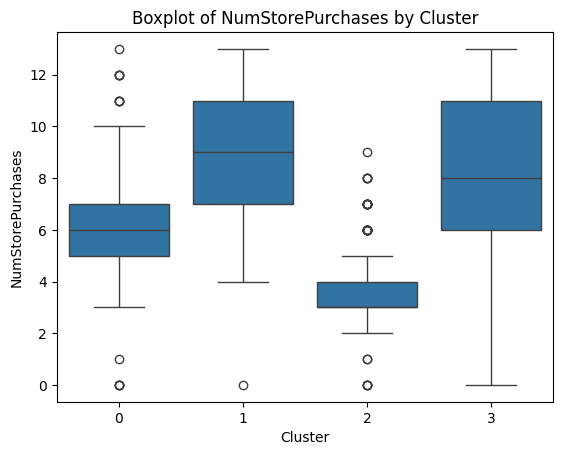

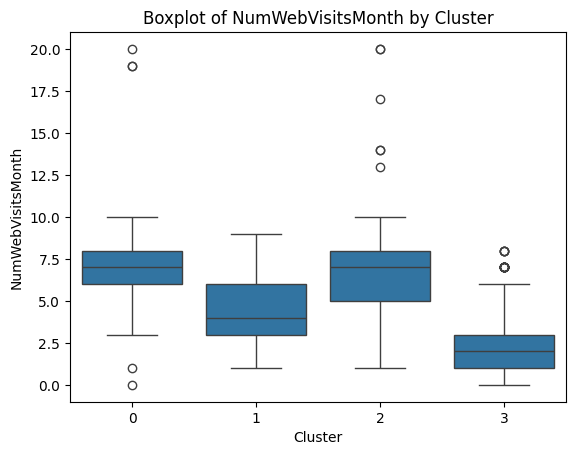

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/ifood_df.csv'
ifood_df = pd.read_csv('ifood_df.csv')

# Select relevant features for clustering
features = ifood_df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Optimal number of clusters (Assume 4 for this example)
optimal_k = 4

# K-means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
ifood_df['Cluster'] = kmeans.labels_

# PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
ifood_df['PCA1'] = principal_components[:, 0]
ifood_df['PCA2'] = principal_components[:, 1]

# Visualization
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=ifood_df, palette='Set1')
plt.title('Customer Segmentation using K-means Clustering')
plt.show()

# Display cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features.columns)
print("Cluster Centroids:")
print(centroid_df)

# Analyze cluster characteristics
for feature in features.columns:
    sns.boxplot(x='Cluster', y=feature, data=ifood_df)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()


6.Insights and Recommendations

After performing the K-means clustering and visualizing the customer segments, the next step is to analyze the characteristics of each segment and derive insights and recommendations. Below is an outline of how you can approach this analysis and what kind of insights and recommendations you might derive based on the provided data.

Step 1: Understanding Cluster Characteristics
Profile the Clusters: Examine the cluster centroids to understand the average behavior of each cluster. This helps in profiling each segment.

Analyze Key Features: Look at the distribution of key features within each cluster to understand the unique characteristics.

Visualize Differences: Use visualizations like box plots and bar charts to highlight the differences between clusters.

Step 2: Derive Insights
Based on the cluster profiles and key feature analysis, derive insights such as:

High-Value Customers: Identify clusters with high average income and spending across various product categories.

Budget-Conscious Customers: Identify clusters with lower average income and spending, but possibly higher frequency of deals purchases.

Product Preferences: Understand product preferences by examining which clusters spend more on certain product categories.

Purchase Channels: Determine preferred purchase channels (e.g., web, catalog, store) for each cluster.

Step 3: Provide Recommendations
Marketing Strategies: Tailor marketing strategies for each segment based on their profiles.

High-value customers might benefit from personalized offers and loyalty programs.
Budget-conscious customers could be targeted with promotions and discounts.
Product Recommendations: Suggest relevant products based on cluster preferences.

Clusters spending more on wines could be introduced to premium wine products.
Clusters spending more on meat products might be interested in related products like gourmet sauces.
Channel Optimization: Optimize marketing channels.

Clusters with high web purchases could be targeted with online advertisements.
Clusters with high store purchases might benefit from in-store promotions.
